In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg

from basics import alpha

resultsfilename = "data_stats-outliers-replaced.csv"
st_ = pd.read_csv(resultsfilename)
print("Loading", len(st_), "lines of stats.")

Loading 876 lines of stats.


# Comparison of RT, AUC, Correct, and JoM on the two fonts depending on training

For both studies together and lexical task

Designers : comparing RTnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,4802.0,0.000165,0.286,0.643


----> the median is different

Non-designers : comparing RTnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,3861.0,0.000743,0.272,0.636


----> the median is different



Designers : comparing AUCnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,6829.5,0.827328,-0.015,0.336


----> the median is the same

Non-designers : comparing AUCnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,5178.5,0.717502,0.024,0.261


----> the median is the same



Designers : comparing Correctnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,6827.0,0.844738,-0.015,0.428


----> the median is the same

Non-designers : comparing Correctnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,4602.0,0.084949,0.132,0.435


----> the median is the same



Designers : comparing JoM between the two fonts


,U-val,p-val,RBC,CLES
MWU,7786.0,0.037848,-0.157,0.554


----> the median is different

Non-designers : comparing JoM between the two fonts


,U-val,p-val,RBC,CLES
MWU,5561.5,0.545854,-0.048,0.49


----> the median is the same



For study #1 and lexical task

Designers : comparing RTnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,1081.0,0.041259,0.23,0.615


----> the median is different

Non-designers : comparing RTnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,739.0,0.056533,0.237,0.618


----> the median is the same



Designers : comparing AUCnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,1309.5,0.48508,0.068,0.312


----> the median is the same

Non-designers : comparing AUCnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,922.5,0.636749,0.047,0.263


----> the median is the same



Designers : comparing Correctnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,1304.0,0.516862,0.072,0.439


----> the median is the same

Non-designers : comparing Correctnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,889.0,0.48947,0.082,0.408


----> the median is the same



Designers : comparing JoM between the two fonts


,U-val,p-val,RBC,CLES
MWU,1604.5,0.206479,-0.142,0.551


----> the median is the same

Non-designers : comparing JoM between the two fonts


,U-val,p-val,RBC,CLES
MWU,1010.0,0.726035,-0.043,0.477


----> the median is the same



For study #2 and lexical task

Designers : comparing RTnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,1334.0,0.001517,0.328,0.664


----> the median is different

Non-designers : comparing RTnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,1182.0,0.002671,0.321,0.66


----> the median is different



Designers : comparing AUCnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,2133.5,0.439347,-0.075,0.404


----> the median is the same

Non-designers : comparing AUCnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,1739.5,0.997387,0.001,0.257


----> the median is the same



Designers : comparing Correctnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,2166.0,0.371798,-0.091,0.478


----> the median is the same

Non-designers : comparing Correctnorm between the two fonts


,U-val,p-val,RBC,CLES
MWU,1433.0,0.083796,0.177,0.461


----> the median is the same



Designers : comparing JoM between the two fonts


,U-val,p-val,RBC,CLES
MWU,2335.5,0.08541,-0.177,0.557


----> the median is the same

Non-designers : comparing JoM between the two fonts


,U-val,p-val,RBC,CLES
MWU,1842.0,0.584841,-0.058,0.501


----> the median is the same





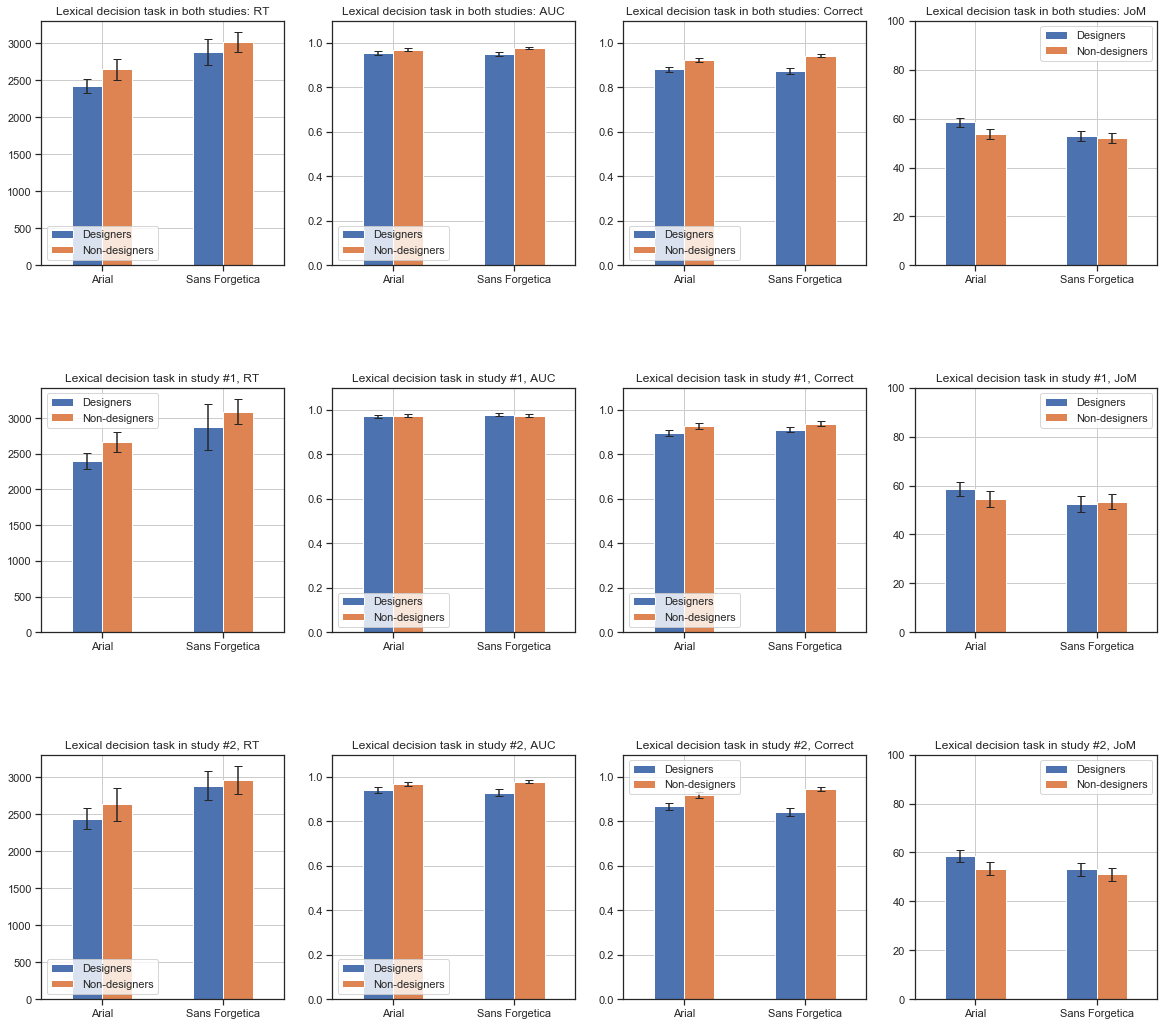

In [106]:
# Comparison of RT, AUC, Correct, and JoM of the two fonts
# depending on the design training

# MWU tests the hypothesis that data in x and y are samples
# from continuous distributions with equal medians.
# The test assumes that x and y are independent.

# Legend
# RBC: The rank biserial correlation is the difference between
# the proportion of favorable evidence minus the proportion
# of unfavorable evidence (see Kerby 2014).
# CLES: The common language effect size is the probability (from 0 to 1)
# that a randomly selected observation from the first sample will be greater
# than a randomly selected observation from the second sample.

# only for the lexical task
ttype = "lexical"
metrics = ["RTnorm", "AUCnorm", "Correctnorm", "JoM"]

# set up plots
fig, axes = plt.subplots(3, 4, figsize=(20, 18))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, sid in enumerate(["all", 1, 2]):
    if sid == "all":
        st = st_[(st_["Type"] == ttype)]
        print("For both studies together and %s task" % ttype)
        title = "Lexical decision task in both studies: %s"
    else:
        st = st_[(st_["Type"] == ttype) & (st_["StudyID"] == sid)]
        print("For study #%d and %s task" % (sid, ttype))
        title = "Lexical decision task in study #%s, %%s" % sid
    print()

    for j, metric in enumerate(metrics):
        means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
        errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
        for isDesigner in [True, False]:
            designer_ = ["Non-designers", "Designers"][isDesigner]
            print(designer_, ": comparing", metric, "between the two fonts")
            x = st[(st["isDesigner"] == isDesigner) & (st["Font"] == "arial")]
            y = st[(st["isDesigner"] == isDesigner) & (st["Font"] == "sansforgetica")]
            res = pg.mwu(x[metric], y[metric], tail="two-sided")
            display(res)
            if res.loc["MWU", "p-val"] > alpha:
                print("----> the median is the same")
                print()
            else:
                print("----> the median is different")
                print()
            # plot it using non-normalized metric
            metric_ = metric.replace("norm", "")
            means[designer_]["Arial"] = x[metric_].mean()
            errors[designer_]["Arial"] = x[metric_].sem()
            means[designer_]["Sans Forgetica"] = y[metric_].mean()
            errors[designer_]["Sans Forgetica"] = y[metric_].sem()
        if metric_ in ["AUC", "Correct"]:
            lim = (0, 1.1)
        elif metric_ == "JoM":
            lim = (0, 100)
        else:
            lim = None
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[i][j],
                       title=title % metric_,
                       grid=True,
                       ylim=lim,
                       rot=0)
        print()
        print()

# Comparison of AUC for words and non-words depending on training

Comparison of AUC for words depending on training, only in study #2


,U-val,p-val,RBC,CLES
MWU,7260.5,0.746767,0.023,0.42


----> the median is the same

Comparison of AUC for non-words depending on training, only in study #2


,U-val,p-val,RBC,CLES
MWU,5720.0,0.001403,0.231,0.53


----> the median is different





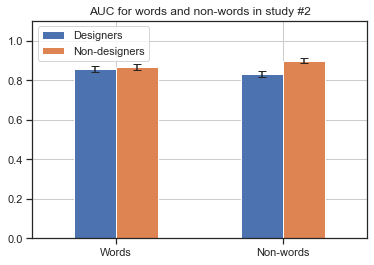

In [108]:
# Comparison of AUC for words and non-words
# depending on the design training
# using MWU

# only for study #2
sid = 2
st = st_[st_["StudyID"] == sid]

# set up plots
#fig, axes = plt.subplots(1, 2, figsize=(10, 12))
#plt.subplots_adjust(wspace=0.2, hspace=1)

means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Words", "Non-words"])
errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Words", "Non-words"])
for i, metric in enumerate(["AUCnorm_word", "AUCnorm_nonword"]):
    category = ["Words", "Non-words"][i]
    print("Comparison of AUC for", category.lower(), "depending on training, only in study #2")
    x = st[st["isDesigner"] == True]
    y = st[st["isDesigner"] == False]
    res = pg.mwu(x[metric], y[metric], tail="two-sided")
    display(res)
    if res.loc["MWU", "p-val"] > alpha:
        print("----> the median is the same")
        print()
    else:
        print("----> the median is different")
        print()
    # plot it using non-normalized metric
    metric_ = metric.replace("norm", "")
    means["Designers"][category] = x[metric_].mean()
    errors["Designers"][category] = x[metric_].sem()
    means["Non-designers"][category] = y[metric_].mean()
    errors["Non-designers"][category] = y[metric_].sem()
means.plot.bar(yerr=errors,
               capsize=4,
               grid=True,
               ylim=(0, 1.1),
               rot=0,
               title="AUC for words and non-words in study #2")
print()
print()

# Comparison of JoM for Arial and SF between designers and non-designers

Comparison of JoM between designers and non-designers for arial


,U-val,p-val,RBC,CLES
MWU,25991.5,0.11121,-0.088,0.515


----> the median is the same

Comparison of JoM between designers and non-designers for sansforgetica


,U-val,p-val,RBC,CLES
MWU,24718.5,0.532132,-0.034,0.489


----> the median is the same



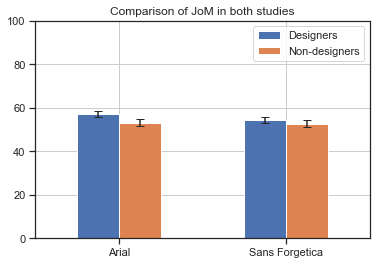

In [109]:
# Comparison of JoM for Arial and SF between designers and non-designers
# using MWU

st = st_

means = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
errors = pd.DataFrame(columns=["Designers", "Non-designers"], index=["Arial", "Sans Forgetica"])
for metric in ["JoM"]:
    for font in ["arial", "sansforgetica"]:
        print("Comparison of", metric, "between designers and non-designers for", font)
        x = st[(st["isDesigner"] == True) & (st["Font"] == font)][metric]
        y = st[(st["isDesigner"] == False) & (st["Font"] == font)][metric]
        res = pg.mwu(x, y, tail="two-sided")
        display(res)
        if res.loc["MWU", "p-val"] > alpha:
            print("----> the median is the same")
            print()
        else:
            print("----> the median is different")
            print()
        # plot it
        font_ = font.title().replace("Sansf", "Sans F")
        means["Designers"][font_] = x.mean()
        means["Non-designers"][font_] = y.mean()
        errors["Designers"][font_] = x.sem()
        errors["Non-designers"][font_] = y.sem()
    means.plot.bar(yerr=errors,
                   capsize=4,
                   grid=True,
                   ylim=(0, 100),
                   rot=0,
                   title="Comparison of JoM in both studies")